# <p style="text-align:center;#D3D3D3;font-size:44px;font-weight:bolder;padding:0.3em 0 0.5em;border-radius:10px 10px;font-stretch: 125%;margin:0;line-height:115%;">🧱 CONCRETE COMPRESSIVE STRENGTH PREDICTION 🧱</p>

***
🪦 Problem Statement:
=================
The quality of concrete is determined by its compressive strength, which is measured
using a conventional crushing test on a concrete cylinder. 

The strength of the concrete is also a vital aspect in achieving the requisite longevity. 
It will take 28 days to test strength, which is a long period. 

So, what will we do now? We can save a lot of time and effort by using Data Science 
to estimate how much quantity of which raw material we need for acceptable compressive strength
***

❇️ AIM : 

To build a solution that should able to predict the compressive strength of the concrete.(Using Machine Learning)

❇️ APPROACH: 

The classical machine learning tasks like Data Exploration, Data Cleaning, Feature Engineering, Model Building and Model Testing. 
           Different machine learning algorithms that’s best fit for the above case will be tried out.

***

<a id="1"></a>
# <p style="text-align:Left; color:#F6F6F6; background-color:#696969; font-size:40px; font-weight:bolder; padding:0.2em 0 0.3em;border-radius:10px 10px;box-shadow:0px 0px 2px black;margin:0;"> ❇️  CONTENTS</p>

1. [Overview](#1.0)
2. [Import the necessary libraries](#2.0)
3. [Data Collection](#3.0)
4. [Data Cleaning](#4.0)
	- [4.1 Check Duplicates](#4.1)
	- [4.2 Drop Duplicates](#4.2)
	- [4.3 Check Outliers](#4.3)
	- [4.4 Working with Outliers: Correcting, Removing](#4.4)
	- [4.5 Check Outliers after correction](#4.5)
	- [4.6 Check Missing Values](#4.6)
5. [EDA (Data Analysis and Preparation)](#5.0)
	- [5.1 Variable Identification](#5.1)
	- [5.2 Univariate Analysis](#5.2)
	- [5.3 Study Summary Statistics](#5.3)
	- [5.4 Multivariate Analysis](#5.4)
	- [5.5 Study Correlation](#5.5)
	- [5.6 EDA (Exploratory Data Analysis) Summary](#5.6)
6. [Feature Engineering](#6.0)
	- [6.1 Variable Creation](#6.1)
7. [Model Building and Validation](#7.0)
	- [7.1 Sampling Techniques - Create Training and Test Set](#7.1)
	- [7.2 Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree help](#7.2)
	- [7.3 Explore for gaussians. If data is likely to be a mix of gaussians, explore individual clusters and presenting my findings in terms of the independent attributes and their suitability to predict strength](#7.3)
	- [7.4 Overall Summary - Before feature selection](#7.4)
8. [Feature Selection Methods](#8.0)
	- [8.1 Feature Importance](#8.1)
	- [8.2 Overall summary - after feature selection](#8.2)
	- [8.3 Comparison of with and without feature selection methods](#8.3)
9. [Optimization](#9.0)
	- [9.1 Hyper Parameter Tuning](#9.1)
	- [9.2 Bootstrap Sampling - Model performance range at 95% confidence level](#9.2)
10. [Conclusion](#10.0)


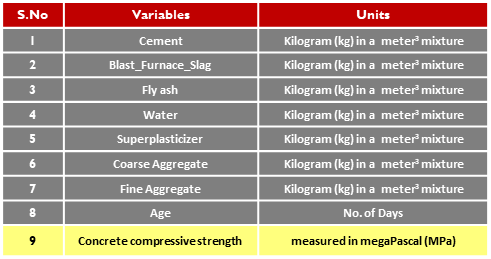

<a id="1"></a>
# <p style="text-align:center; color:#F6F6F6; background-color:#696969; font-size:40px; font-weight:bolder; padding:0.3em 0 0.4em;border-radius:10px 10px;box-shadow:0px 0px 2px black;margin:0;">IMPORTING LIBRARIES 📚</p>

In [264]:
#IMPORTING THE NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
import sys

import missingno as mno

import plotly.graph_objects as go
from plotly.subplots import make_subplots

<a id="1"></a>
# <p style="text-align:center;color:#F6F6F6; background-color:#696969 ;font-size:40px;font-weight:bolder;padding:0.3em 0 0.3em;border-radius:8px 10px;box-shadow:0px 0px 2px black;margin:0;">LOADING DATA 💾</p>

In [265]:
# loading the dataset
dataset = pd.read_csv("D:/DATA/iNeuron/Concrete/concrete_data.csv")

In [266]:
target = dataset['concrete_compressive_strength']
features = dataset.iloc[:-1]

In [267]:
original_dataset = dataset.copy
display(dataset.head())

cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   coarse_aggregate  fine_aggregate   age  concrete_compressive_strength  
0            1040.0            676.0   28                          79.99  
1            1055.0            676.0   28                          61.89  
2             932.0            594.0  270                          40.27  
3             932.0            594.0  365                          41.05  
4             978.4            825.5  360                          44.30

In [268]:
print('\n\033[1mINFORMATION    :\033[0m \nThe Datset consists of \nFeatures       =  {}  \nTotal Samples  =  {}'.format(dataset.shape[1], dataset.shape[0]))


INFORMATION    : 
The Datset consists of 
Features       =  9  
Total Samples  =  1030


<a id="1"></a>
# <p style="text-align:center;color:#F6F6F6; background-color:#696969 ;font-size:40px;font-weight:bolder;padding:0.3em 0 0.3em;border-radius:8px 10px;box-shadow:0px 0px 2px black;margin:0;"> 🔎 DATA EXPLORATION 🔍</p>

In [269]:
dataset.describe().T

count        mean         std     min  \
cement                         1030.0  281.167864  104.506364  102.00   
blast_furnace_slag             1030.0   73.895825   86.279342    0.00   
fly_ash                        1030.0   54.188350   63.997004    0.00   
water                          1030.0  181.567282   21.354219  121.80   
superplasticizer               1030.0    6.204660    5.973841    0.00   
coarse_aggregate               1030.0  972.918932   77.753954  801.00   
fine_aggregate                 1030.0  773.580485   80.175980  594.00   
age                            1030.0   45.662136   63.169912    1.00   
concrete_compressive_strength  1030.0   35.817961   16.705742    2.33   

                                   25%      50%       75%     max  
cement                         192.375  272.900   350.000   540.0  
blast_furnace_slag               0.000   22.000   142.950   359.4  
fly_ash                          0.000    0.000   118.300   200.1  
water                          164.900  185.000   192.000   247.0  
superplasticizer                 0.000    6.400    10.200    32.2  
coarse_aggregate               932.000  968.000  1029.400  1145.0  
fine_aggregate                 730.950  779.500   824.000   992.6  
age                              7.000   28.000    56.000   365.0  
concrete_compressive_strength   23.710   34.445    46.135    82.6

In [270]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


<p style = "font-size:20px; color: #FFF200 "><strong> INFERENCE </strong></p> 

1) In the given dataset, All the columns are numerical  
2) All the columns datatype belong to float64,  Except for the column 'age' 
3) The data has 8 quantitative input variables and 1 quantitative output variable - concrete_compressive_strength

In [271]:
# Checking for missing values
dataset.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

<Axes: >

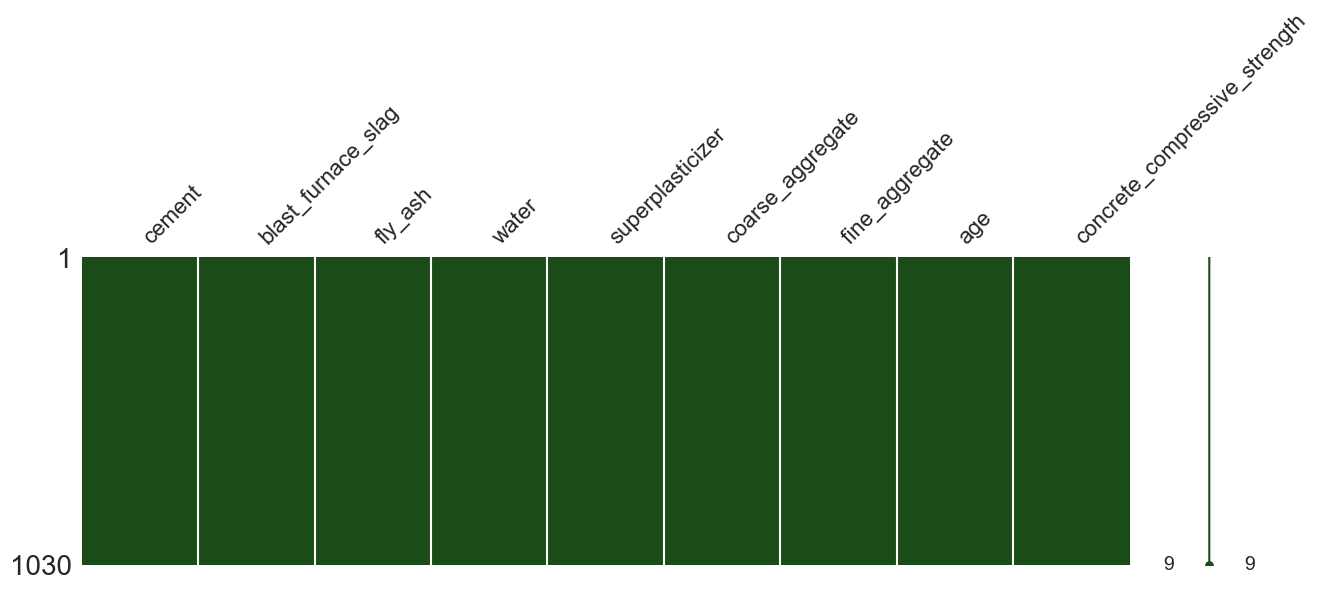

In [272]:
# Visualize missing values
mno.matrix(dataset, figsize=(15, 4), color=(0.1, 0.3, 0.1))

<p style = "font-size:20px; color: #FFF200 "><strong> NO NULL VALUES </strong></p> 

In [273]:
#Checking number of unique rows in each feature

dataset.nunique().sort_values()

age                               14
superplasticizer                 111
fly_ash                          156
blast_furnace_slag               185
water                            195
cement                           278
coarse_aggregate                 284
fine_aggregate                   302
concrete_compressive_strength    845
dtype: int64

In [274]:
# Checking the dataset for duplicates

print("The number of duplicated rows = ", dataset.duplicated().sum())

The number of duplicated rows =  25


In [275]:
# Viewing the duplicate records
duplicates = dataset.duplicated()

dataset[duplicates]

cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
77    425.0               106.3      0.0  153.5              16.5   
80    425.0               106.3      0.0  153.5              16.5   
86    362.6               189.0      0.0  164.9              11.6   
88    362.6               189.0      0.0  164.9              11.6   
91    362.6               189.0      0.0  164.9              11.6   
100   425.0               106.3      0.0  153.5              16.5   
103   425.0               106.3      0.0  153.5              16.5   
109   362.6               189.0      0.0  164.9              11.6   
111   362.6               189.0      0.0  164.9              11.6   
123   425.0               106.3      0.0  153.5              16.5   
126   425.0               106.3      0.0  153.5              16.5   
132   362.6               189.0      0.0  164.9              11.6   
134   362.6               189.0      0.0  164.9              11.6   
137   362.6               189.0      0.0  164.9              11.6   
146   425.0               106.3      0.0  153.5              16.5   
149   425.0               106.3      0.0  153.5              16.5   
155   362.6               189.0      0.0  164.9              11.6   
157   362.6               189.0      0.0  164.9              11.6   
160   362.6               189.0      0.0  164.9              11.6   
169   425.0               106.3      0.0  153.5              16.5   
172   425.0               106.3      0.0  153.5              16.5   
177   362.6               189.0      0.0  164.9              11.6   
179   362.6               189.0      0.0  164.9              11.6   
182   362.6               189.0      0.0  164.9              11.6   
809   252.0                 0.0      0.0  185.0               0.0   

     coarse_aggregate  fine_aggregate   age  concrete_compressive_strength  
77              852.1            887.1    3                          33.40  
80              852.1            887.1    3                          33.40  
86              944.7            755.8    3                          35.30  
88              944.7            755.8    3                          35.30  
91              944.7            755.8    3                          35.30  
100             852.1            887.1    7                          49.20  
103             852.1            887.1    7                          49.20  
109             944.7            755.8    7                          55.90  
111             944.7            755.8    7                          55.90  
123             852.1            887.1   28                          60.29  
126             852.1            887.1   28                          60.29  
132             944.7            755.8   28                          71.30  
134             944.7            755.8   28                          71.30  
137             944.7            755.8   28                          71.30  
146             852.1            887.1   56                          64.30  
149             852.1            887.1   56                          64.30  
155             944.7            755.8   56                          77.30  
157             944.7            755.8   56                          77.30  
160             944.7            755.8   56                          77.30  
169             852.1            887.1   91                          65.20  
172             852.1            887.1   91                          65.20  
177             944.7            755.8   91                          79.30  
179             944.7            755.8   91                          79.30  
182             944.7            755.8   91                          79.30  
809            1111.0            784.0   28                          19.69

In [276]:
# Delete duplicate rows
dataset.drop_duplicates(inplace=True)

In [277]:
print('\n\033[1mINFORMATION    :\033[0m \nAfter dropping the duplicates, the Dataset contains now \nFeatures       =  {}  \nTotal Samples  =  {}'.format(dataset.shape[1], dataset.shape[0]))


INFORMATION    : 
After dropping the duplicates, the Dataset contains now 
Features       =  9  
Total Samples  =  1005


<p style = "font-size:20px; color: #FFF200 "><strong> INFERENCE </strong></p> 

1) In the given dataset, 25 duplicate rows were found 
2) All the duplicatie rows were dropped from the dataset
3) Initially the dataset had 1030 rows and now after dropping the dataset has now has 1005 rows. 

lets move on to Data Visualization

<a id="1"></a>
# <p style="text-align:center;color:#F6F6F6; background-color:#696969 ;font-size:40px;font-weight:bolder;padding:0.3em 0 0.3em;border-radius:8px 10px;box-shadow:0px 0px 2px black;margin:0;"> DATA VISUALIZATION 📈📊 </p>

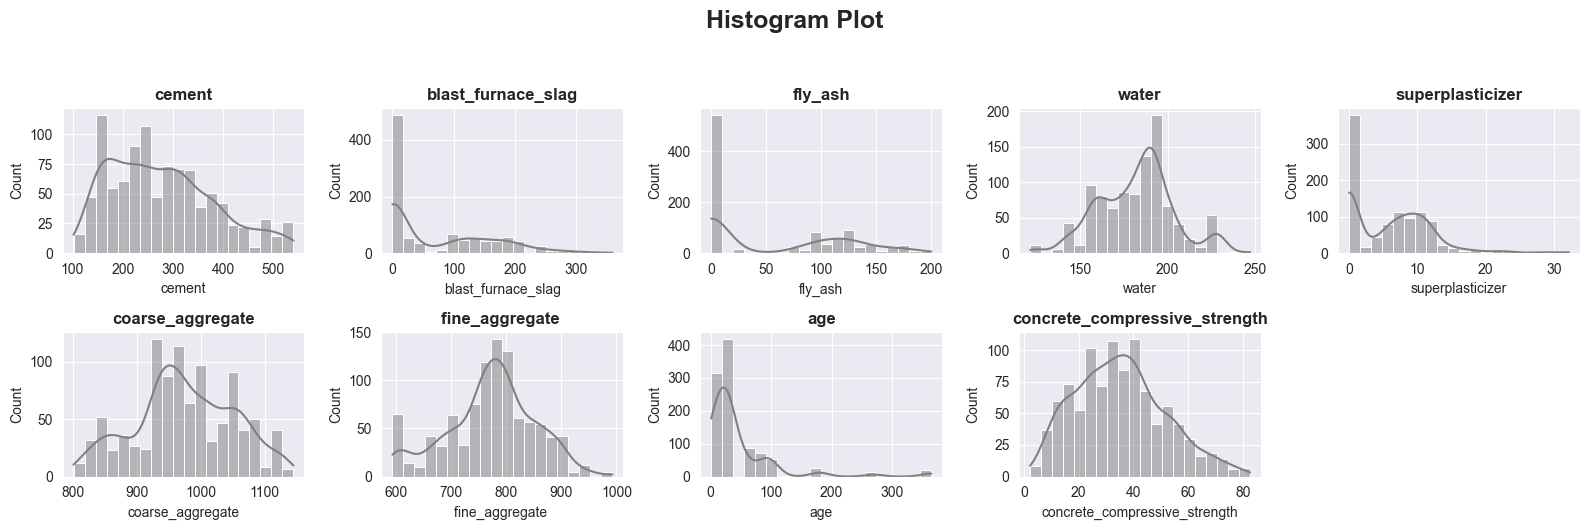

In [278]:
# Plotting  histograms for all the  variables

sns.set_style('darkgrid')
plt.figure(figsize=(16, 5))
plt.suptitle('Histogram Plot', y=1.05, weight='bold', fontsize =18)
for n, col in enumerate(dataset):
    plt.subplot(2, 5, n + 1)
    sns.histplot(data= dataset, x=col, kde=True, color = 'gray', bins=20)
    plt.title(f'{col}', weight = 'bold')
plt.tight_layout()
plt.show()

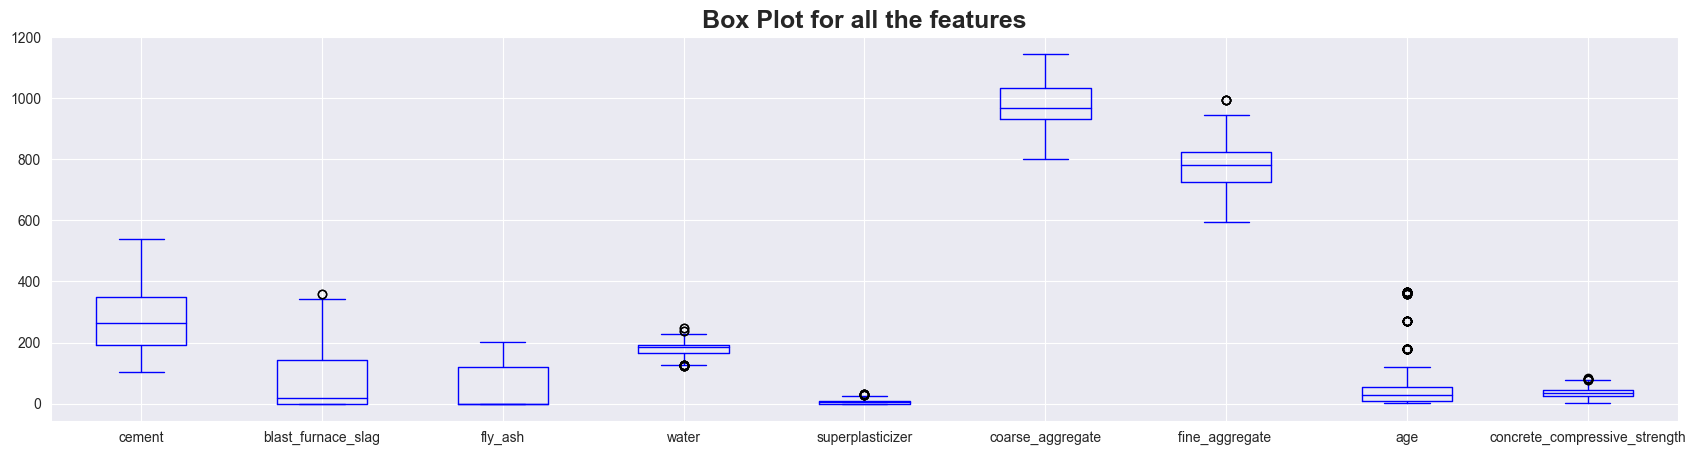

In [279]:
# Box plots for numerical variables
plt.figure(figsize=(21, 5))
plt.title('Box Plot for all the features', y=1, weight='bold', fontsize =18)  
dataset.boxplot(column = ['cement', 'blast_furnace_slag', 'fly_ash', 'water', 
            'superplasticizer', 'coarse_aggregate', 'fine_aggregate ', 'age', 'concrete_compressive_strength'], color='blue');

C:\Users\Praveen\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:632: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.

C:\Users\Praveen\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:632: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.

C:\Users\Praveen\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:632: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.

C:\Users\Praveen\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:632: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.

C:\Users\Praveen\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:632: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.

C:\Users\Praveen\App

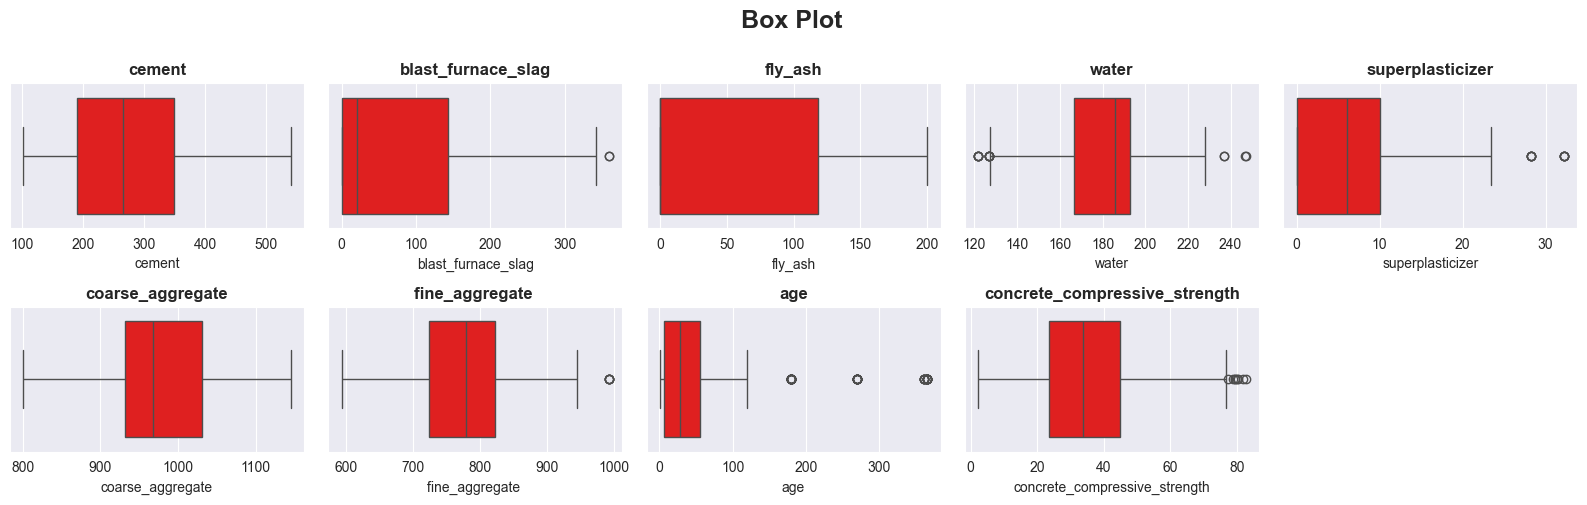

In [280]:
# Box plots for numerical variables
plt.figure(figsize=(16, 5))
plt.suptitle('Box Plot', y=1, weight='bold', fontsize =18)  
for n, features in enumerate(dataset):
    plt.subplot(2, 5, n + 1)
    sns.boxplot(data=dataset, x = features, color='red', legend=False)
    plt.title(f'{features}', weight='bold')
plt.tight_layout()
plt.show()

<p style = "font-size:20px; color: #FFF200 "><strong> INFERENCE </strong></p> 
 
From the 2 box plots above --> Slag, Water, Superplasticizer, Fine aggregate, Age and CC_Strength columns have outliers and needs to be treated.

In [281]:
# Removing outliers by standard methods and Plotting graphs:
df_outliers = pd.DataFrame(dataset.loc[:,])

for col in df_outliers:
  # Using IQR method to define the range of inliners:
  q1, q3, median = dataset[col].quantile([0.25,0.75,0.5])
  lower_limit = q1 - 1.5*(q3-q1)
  upper_limit = q3 + 1.5*(q3-q1)

  # Replacing Outliers with median value
  df_outliers[col] = np.where(df_outliers[col] > upper_limit, median,np.where(
                         df_outliers[col] < lower_limit,median,df_outliers[col]))

In [282]:
dataset = df_outliers.copy()

In [283]:
# Box plots after treating outliers
fig = make_subplots(rows = 2, cols = 5, subplot_titles=tuple(dataset.columns))

for n , feature in enumerate(dataset.columns, start = 1):
    row = (n - 1) // 5 + 1 
    col = (n - 1) % 5 + 1
    fig.add_trace(go.Box(y=dataset[feature], name = feature), row = row, col= col)

fig.update_layout(height = 500, width = 1500, title_text = "____________________________________Box plots after treating outliers__________________________________")
fig.show()


<p style = "font-size:20px; color: #FFF200 "><strong> INFERENCE </strong></p> 

most of the outliers have been treated

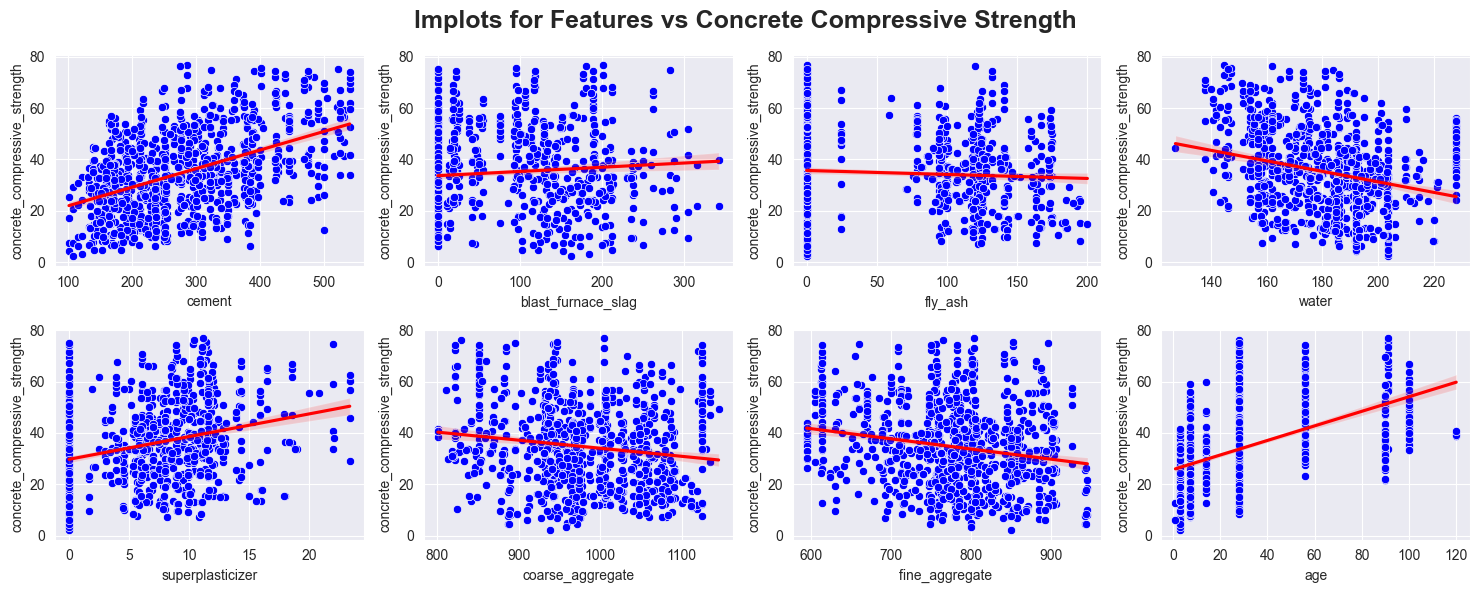

In [284]:
# Assuming 'dataset' is your DataFrame and 'concrete_compressive_strength' is the target variable
target_column_name = 'concrete_compressive_strength'

# List of features
features = ['cement', 'blast_furnace_slag', 'fly_ash', 'water', 
            'superplasticizer', 'coarse_aggregate', 'fine_aggregate ', 'age']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 6))
fig.suptitle('lmplots for Features vs Concrete Compressive Strength', fontsize=18, weight='bold')

# Flatten the axes array
axes = axes.flatten()

# Create lmplots for each feature
for i, feature in enumerate(features):
    sns.scatterplot(x=feature, y=target_column_name, data=dataset, ax=axes[i], color = 'b')
    sns.regplot(x=feature, y=target_column_name, data=dataset, scatter=False, ax=axes[i], color = 'r')

# Remove any unused subplots
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [285]:
# Define custom bin edges
bins = [0, 20, 40, 60, 85]

# Define corresponding bin labels
bin_labels = ["0 to 20", "20 to 40", "40 to 60", "60 to 85"]

# Create bins using pd.cut()
bin_categories = pd.cut(dataset['concrete_compressive_strength'], bins=bins, labels=bin_labels)

# Create a copy of the dataset
dataset1 = dataset.copy()

# Add bins to the copied dataset
dataset1['bins'] = bin_categories


C:\Users\Praveen\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

C:\Users\Praveen\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

C:\Users\Praveen\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

C:\Users\Praveen\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, yo

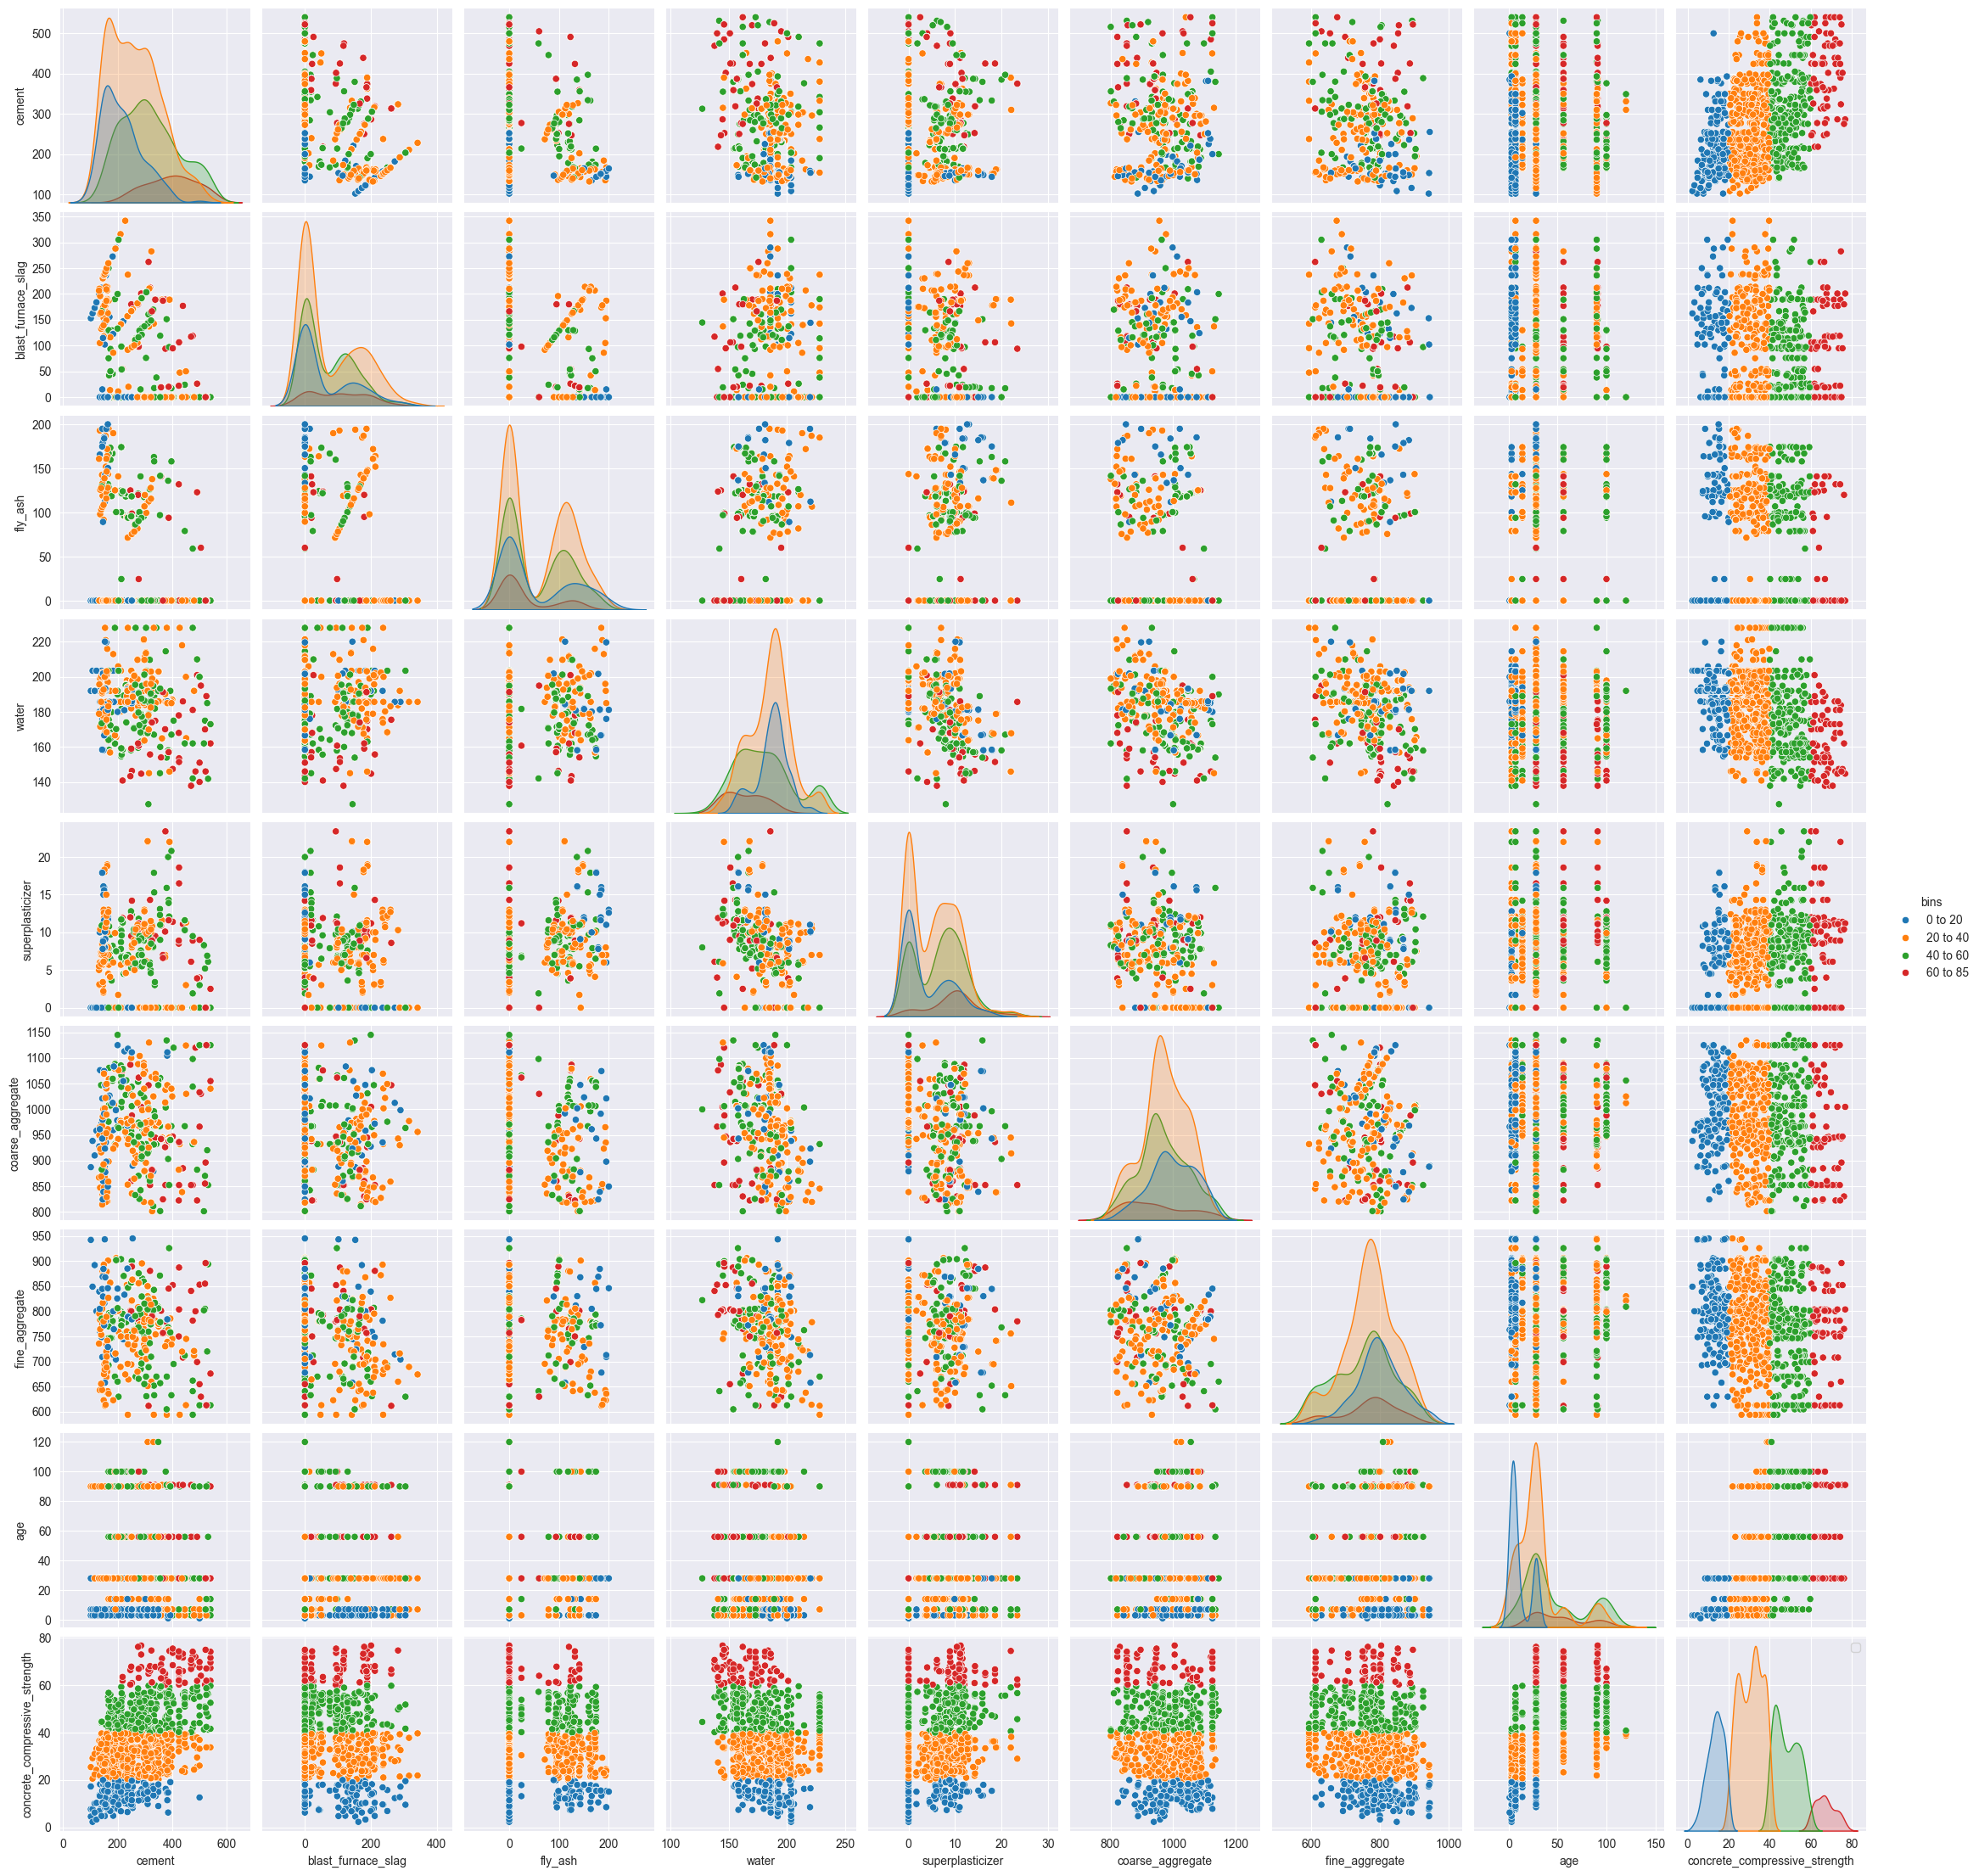

In [286]:
# Pairwise plots of all the  variables
sns.pairplot(dataset1, hue='bins')
plt.legend()
plt.show()

<p style = "font-size:20px; color: #FFF200 "><strong> INFERENCE </strong></p> 

 * From the pair plots, a Right skewed distribution is observed for majority of the features. Except for the aggregates and water. 
 * At least 2 Gaussian (2 peaks) in furnace_Slag, fly_Ash, Superplasticer and Age, even though it's not unsupervised learning but in this dataset there are at least 2 clusters and there may be more.
 * Majority of the dataset is seen in the Range between 20 to 40 mPa for the concrete strength. 


<p style = "font-size:20px; color: #FF00200 "><strong> Relationship between independent features </strong></p> 

1) $Cement$ : Widely spread data can be observed , with a linear increase for most of the other features.

2) $Burnt-furnace-slag$ : Seems to have a large amount of right skewed and clustered below 200 kg  $m^3$ for most of the other features.

3) $Fly Ash$: Seems to have a dual distribution with values either zero or more than 100 kg  $m^3$ for most of the other features.

4) $Water$ : Widely spread data can be observed. with a negative linear relation with most of the features.

5) $Superplastic$ :Largely clustered around 5 to 15 units , with a linear increase for most of the other features.

6) $Coarseaggregate$ :Widely spread data can be observed. with a negative linear relation with most of the features.

7) $Fineaggregate$ : Widely spread data can be observed. with a negative linear relation with most of the features.

8) $Age$ : A linear increase for most of the other features. Large data seen for a low age count can be seen in the given dataset.


<p style = "font-size:20px; color: #FF00200 "><strong> Concrete Compressive Strength  </strong></p> 

Cement, Water, Superplasticizer and Age can be observed to have good linear relationship compared to other features
***


<p style = "font-size:30px; color: #FFF200 "><strong> Correlation studies of Concrete Compressive Strength  </strong></p> 

In [287]:
dataset.corr()

cement  blast_furnace_slag   fly_ash  \
cement                         1.000000           -0.303669 -0.385610   
blast_furnace_slag            -0.303669            1.000000 -0.308903   
fly_ash                       -0.385610           -0.308903  1.000000   
water                         -0.053217            0.132249 -0.296261   
superplasticizer              -0.026511            0.034945  0.492786   
coarse_aggregate              -0.086205           -0.277239 -0.026468   
fine_aggregate                -0.262508           -0.291118  0.103619   
age                           -0.038201           -0.035485  0.063818   
concrete_compressive_strength  0.478569            0.088486 -0.063067   

                                  water  superplasticizer  coarse_aggregate  \
cement                        -0.053217         -0.026511         -0.086205   
blast_furnace_slag             0.132249          0.034945         -0.277239   
fly_ash                       -0.296261          0.492786         -0.026468   
water                          1.000000         -0.610666         -0.213945   
superplasticizer              -0.610666          1.000000         -0.195028   
coarse_aggregate              -0.213945         -0.195028          1.000000   
fine_aggregate                -0.425633          0.136685         -0.144140   
age                           -0.034910          0.057438          0.022952   
concrete_compressive_strength -0.260649          0.301267         -0.154250   

                               fine_aggregate        age  \
cement                               -0.262508 -0.038201   
blast_furnace_slag                   -0.291118 -0.035485   
fly_ash                               0.103619  0.063818   
water                                -0.425633 -0.034910   
superplasticizer                      0.136685  0.057438   
coarse_aggregate                     -0.144140  0.022952   
fine_aggregate                        1.000000  0.051224   
age                                   0.051224  1.000000   
concrete_compressive_strength        -0.197317  0.495583   

                               concrete_compressive_strength  
cement                                              0.478569  
blast_furnace_slag                                  0.088486  
fly_ash                                            -0.063067  
water                                              -0.260649  
superplasticizer                                    0.301267  
coarse_aggregate                                   -0.154250  
fine_aggregate                                     -0.197317  
age                                                 0.495583  
concrete_compressive_strength                       1.000000

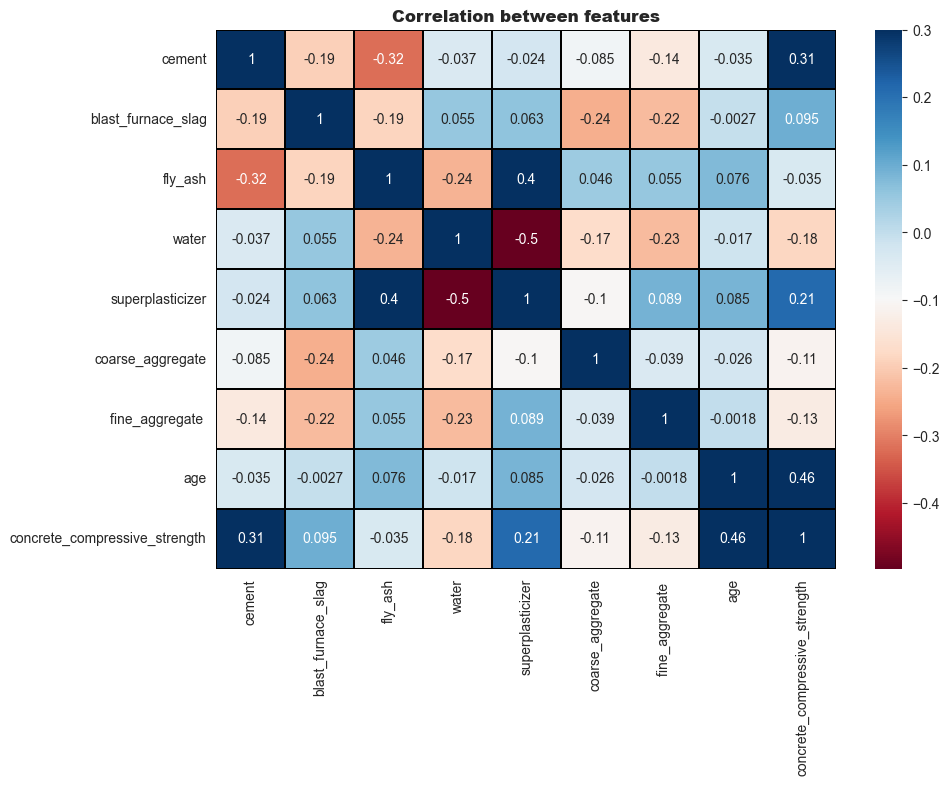

In [288]:
# Correlation heatmap
corr = dataset.corr(method='kendall')
plt.figure(figsize=(10, 7))
sns.heatmap(corr, vmax=.3, linewidths=0.05, annot=True, cmap='RdBu', linecolor="black")
plt.title('Correlation between features', weight = 'heavy')
plt.show()

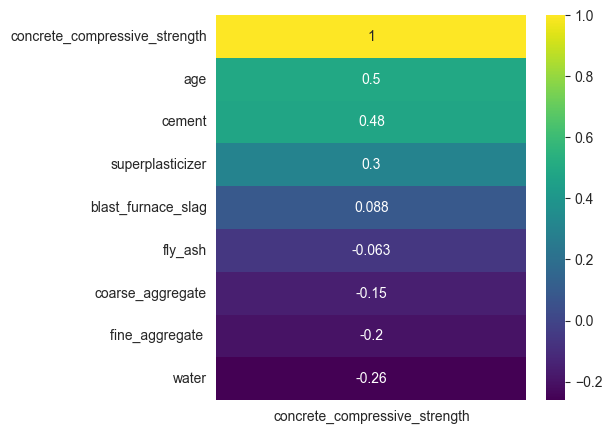

In [289]:
plt.figure(figsize=(5, 5)) 
heatmap = sns.heatmap(dataset.corr()[['concrete_compressive_strength']].sort_values(['concrete_compressive_strength'], ascending = False), annot = True, cmap = 'viridis')

<a id="1"></a>
# <p style="text-align:center;color:#F6F6F6; background-color:#696969 ;font-size:40px;font-weight:bolder;padding:0.3em 0 0.3em;border-radius:8px 10px;box-shadow:0px 0px 2px black;margin:0;"> MODEL BUILDING 📈📊 </p>

In [290]:
# splitting into independant and target features

features = dataset.iloc[:, :-1]
target =  dataset['concrete_compressive_strength']# splitting into independant and target features

features = dataset.iloc[:, :-1]
target =  dataset['concrete_compressive_strength']

In [291]:
features.head()

cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   coarse_aggregate  fine_aggregate    age  
0            1040.0            676.0  28.0  
1            1055.0            676.0  28.0  
2             932.0            594.0  28.0  
3             932.0            594.0  28.0  
4             978.4            825.5  28.0

In [292]:
target

0       33.80
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: concrete_compressive_strength, Length: 1005, dtype: float64

In [293]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [294]:
features_scaled = std_scaler.fit_transform(features)

In [295]:
features_scaled

array([[ 2.50611568, -0.83767708, -0.86537497, ...,  0.84630238,
        -1.21385275, -0.14890343],
       [ 2.50611568, -0.83767708, -0.86537497, ...,  1.03974828,
        -1.21385275, -0.14890343],
       [ 0.51651597,  0.83490565, -0.86537497, ..., -0.54650808,
        -2.25469094, -0.14890343],
       ...,
       [-1.24775558,  0.79851964,  0.82684599, ..., -1.05720525,
         0.10623471, -0.14890343],
       [-1.1461182 ,  1.35369973, -0.86537497, ...,  0.19632417,
         0.21920373, -0.14890343],
       [-0.17001579,  0.3419339 ,  0.35470699, ..., -1.41701462,
        -0.12858854, -0.14890343]])

In [296]:
### Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_scaled,target, test_size= 0.3, random_state=40)

In [297]:
print(f'Train dataset shape: {X_train.shape}, {y_train.shape}')
print(f'Test dataset shape: {X_test.shape}, {y_test.shape}')

Train dataset shape: (703, 8), (703,)
Test dataset shape: (302, 8), (302,)


In [359]:
# writting Function to visualize our models performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


def PerformanceCalculator(trueVals, predVals, name):
         
    rmse = np.sqrt(mean_squared_error(trueVals, predVals))  # Calculating RMSE
    mae = mean_absolute_error(trueVals, predVals)  # Calculating MAE
    mse = mean_squared_error(trueVals, predVals)  # Calculating MSE
    r2 = r2_score(trueVals, predVals)  # Calculating R2
    
    # Compute absolute error between true and predicted values
    diff = abs(trueVals - predVals)

    # Create a dictionary to store true values, predicted values, and absolute error
    ansFrame = {
        'True C_C_Strength': trueVals,
        'Predicted C_C_Strength': predVals,
        'Absolute error': diff 
    }

    # Create a pandas DataFrame from the dictionary
    ansFrame = pd.DataFrame(ansFrame)


    # Calculate marker sizes based on absolute error
    marker_sizes = 50 * (1 + np.log10(ansFrame['Absolute error']))

    # Scatter plot of true vs predicted values with marker sizes based on error
    plt.scatter(ansFrame['True C_C_Strength'], ansFrame['Predicted C_C_Strength'], s=marker_sizes, c=ansFrame['Absolute error'], cmap='turbo', alpha=0.7)

    # Plot the line where true values equal predicted values for reference
    plt.plot(ansFrame['True C_C_Strength'], ansFrame['True C_C_Strength'], color='red', label='True = Predicted')

    plt.xlabel('True Concrete Compressive Strength')
    plt.ylabel('Predicted Concrete Compressive Strength ')
    plt.colorbar(label='Absolute Error')
    plt.title('Performance Metrics for {}'.format(name))
    plt.legend()
    plt.grid(True)
    plt.show()
    return rmse, mae, mse, r2


C:\Users\Praveen\AppData\Roaming\Python\Python311\site-packages\matplotlib\collections.py:963: RuntimeWarning:

invalid value encountered in sqrt



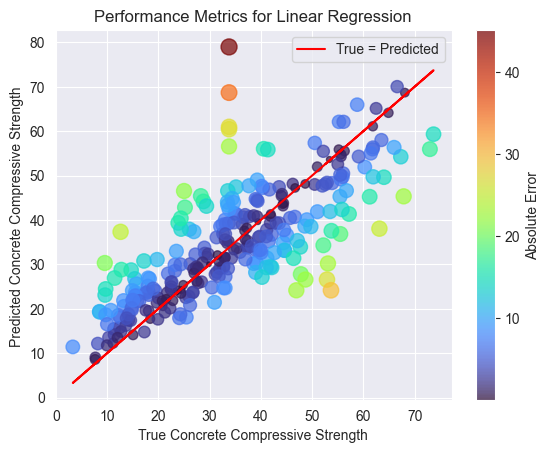

RMSE for Linear Regression  : 9.390438423674128
MAE for Linear Regression   : 6.860813299999851
MSE for Linear Regression   : 88.18033378881543
R2 for Linear Regression    : 0.6222711219096093


In [361]:
# lets start our Analysis with linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

rmse, mae, mse, r2 = PerformanceCalculator(y_test, predictions, 'Linear Regression')
print("RMSE for Linear Regression  :", rmse)
print("MAE for Linear Regression   :", mae)
print("MSE for Linear Regression   :", mse)
print("R2 for Linear Regression    :", r2)

C:\Users\Praveen\AppData\Roaming\Python\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning:

divide by zero encountered in log10

C:\Users\Praveen\AppData\Roaming\Python\Python311\site-packages\matplotlib\collections.py:963: RuntimeWarning:

invalid value encountered in sqrt



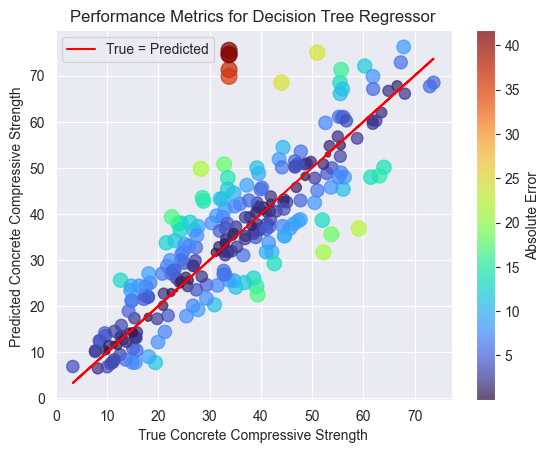

RMSE for Decision Tree Regressor  : 8.52569393769242
MAE for Decision Tree Regressor   : 5.525573951434878
MSE for Decision Tree Regressor   : 72.68745711920529
R2 for Decision Tree Regressor    : 0.6886363381813002


In [362]:
# lets do one better by using a decision Tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
predictions = dt.predict(X_test)

rmse, mae, mse, r2 = PerformanceCalculator(y_test, predictions, 'Decision Tree Regressor')
print("RMSE for Decision Tree Regressor  :", rmse)
print("MAE for Decision Tree Regressor   :", mae)
print("MSE for Decision Tree Regressor   :", mse)
print("R2 for Decision Tree Regressor    :", r2)

C:\Users\Praveen\AppData\Roaming\Python\Python311\site-packages\matplotlib\collections.py:963: RuntimeWarning:

invalid value encountered in sqrt



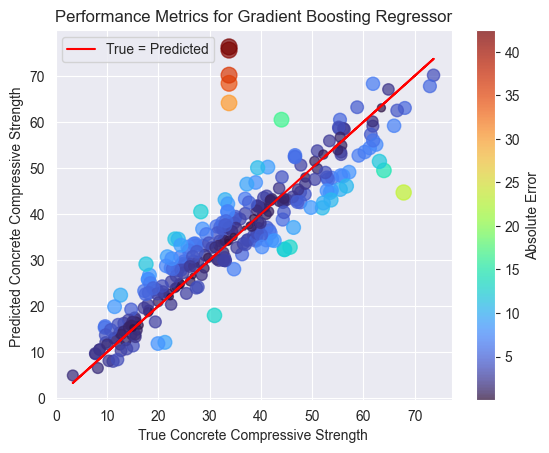

RMSE for Gradient Boosting Regressor  : 7.034444686435219
MAE for Gradient Boosting Regressor   : 4.5312630837332115
MSE for Gradient Boosting Regressor   : 49.48341204651668
R2 for Gradient Boosting Regressor    : 0.7880330804691734


In [363]:
# lets Try gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
predictions = gbr.predict(X_test)

rmse, mae, mse, r2 = PerformanceCalculator(y_test, predictions, 'Gradient Boosting Regressor')
print("RMSE for Gradient Boosting Regressor  :", rmse)
print("MAE for Gradient Boosting Regressor   :", mae)
print("MSE for Gradient Boosting Regressor   :", mse)
print("R2 for Gradient Boosting Regressor    :", r2)

C:\Users\Praveen\AppData\Roaming\Python\Python311\site-packages\matplotlib\collections.py:963: RuntimeWarning:

invalid value encountered in sqrt



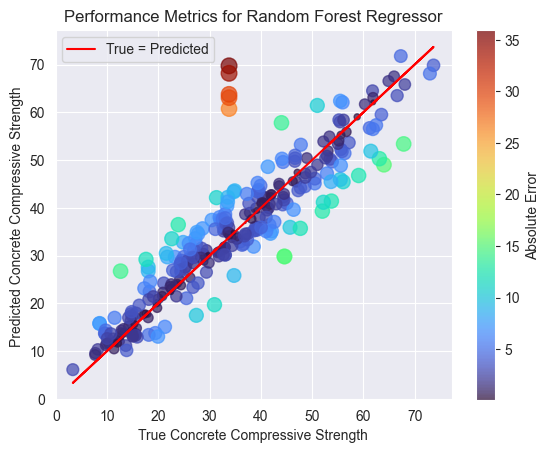

RMSE for Random Forest Regressor  : 6.363361599348888
MAE for Random Forest Regressor   : 4.195091271155261
MSE for Random Forest Regressor   : 40.492370844068034
R2 for Random Forest Regressor    : 0.8265470638069885


In [364]:
# lets try Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

rmse, mae, mse, r2 = PerformanceCalculator(y_test, predictions, 'Random Forest Regressor')
print("RMSE for Random Forest Regressor  :", rmse)
print("MAE for Random Forest Regressor   :", mae)
print("MSE for Random Forest Regressor   :", mse)
print("R2 for Random Forest Regressor    :", r2)

C:\Users\Praveen\AppData\Roaming\Python\Python311\site-packages\matplotlib\collections.py:963: RuntimeWarning:

invalid value encountered in sqrt



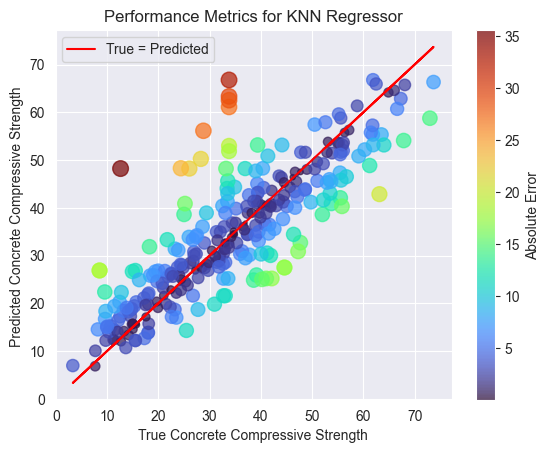

RMSE for KNN Regressor  : 8.303886082204233
MAE for KNN Regressor   : 5.885437086092716
MSE for KNN Regressor   : 68.95452406622516
R2 for KNN Regressor    : 0.7046267132854096


In [365]:
from sklearn.neighbors import KNeighborsRegressor

# Instantiate KNN regressor with desired parameters
knn = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Fit the model
knn.fit(X_train, y_train)

# Make predictions
predictions = knn.predict(X_test)

# Evaluate performance
rmse, mae, mse, r2 = PerformanceCalculator(y_test, predictions, 'KNN Regressor')
print("RMSE for KNN Regressor  :", rmse)
print("MAE for KNN Regressor   :", mae)
print("MSE for KNN Regressor   :", mse)
print("R2 for KNN Regressor    :", r2)

C:\Users\Praveen\AppData\Roaming\Python\Python311\site-packages\matplotlib\collections.py:963: RuntimeWarning:

invalid value encountered in sqrt



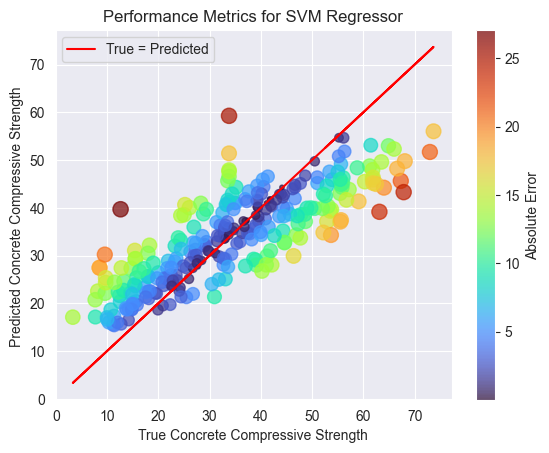

RMSE for SVM Regressor  : 9.124020201923518
MAE for SVM Regressor   : 7.199209756348265
MSE for SVM Regressor   : 83.24774464510847
R2 for SVM Regressor    : 0.6434003384058344


In [366]:
from sklearn.svm import SVR

# Instantiate SVM regressor with desired parameters
svm = SVR(kernel='rbf')  # You can choose different kernels and adjust other parameters as needed

# Fit the model
svm.fit(X_train, y_train)

# Make predictions
predictions = svm.predict(X_test)

# Evaluate performance
rmse, mae, mse, r2 = PerformanceCalculator(y_test, predictions, 'SVM Regressor')
print("RMSE for SVM Regressor  :", rmse)
print("MAE for SVM Regressor   :", mae)
print("MSE for SVM Regressor   :", mse)
print("R2 for SVM Regressor    :", r2)


C:\Users\Praveen\AppData\Roaming\Python\Python311\site-packages\matplotlib\collections.py:963: RuntimeWarning:

invalid value encountered in sqrt



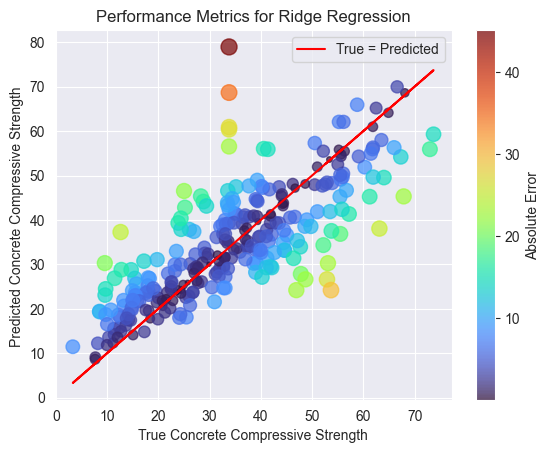

RMSE for Ridge Regression  : 9.387114465100682
MAE for Ridge Regression   : 6.86237124264635
MSE for Ridge Regression   : 88.11791798090246
R2 for Ridge Regression    : 0.6225384859814503


In [367]:
from sklearn.linear_model import Ridge

# Instantiate Ridge regressor with desired parameters
ridge = Ridge(alpha=1.0)  # You can adjust the regularization strength (alpha) as needed

# Fit the model
ridge.fit(X_train, y_train)

# Make predictions
predictions = ridge.predict(X_test)

# Evaluate performance
rmse, mae, mse, r2 = PerformanceCalculator(y_test, predictions, 'Ridge Regression')
print("RMSE for Ridge Regression  :", rmse)
print("MAE for Ridge Regression   :", mae)
print("MSE for Ridge Regression   :", mse)
print("R2 for Ridge Regression    :", r2)


C:\Users\Praveen\AppData\Roaming\Python\Python311\site-packages\matplotlib\collections.py:963: RuntimeWarning:

invalid value encountered in sqrt



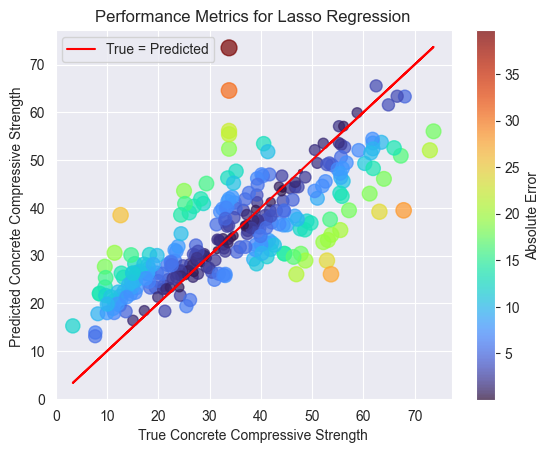

RMSE for Lasso Regression  : 9.60623228483026
MAE for Lasso Regression   : 7.417111137358896
MSE for Lasso Regression   : 92.2796987101152
R2 for Lasso Regression    : 0.6047111009154265


In [368]:
from sklearn.linear_model import Lasso

# Instantiate Lasso regressor with desired parameters
lasso = Lasso(alpha=1.0)  # You can adjust the regularization strength (alpha) as needed

# Fit the model
lasso.fit(X_train, y_train)

# Make predictions
predictions = lasso.predict(X_test)

# Evaluate performance
rmse, mae, mse, r2 = PerformanceCalculator(y_test, predictions, 'Lasso Regression')
print("RMSE for Lasso Regression  :", rmse)
print("MAE for Lasso Regression   :", mae)
print("MSE for Lasso Regression   :", mse)
print("R2 for Lasso Regression    :", r2)

In [369]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Gradient Boosting Regr': GradientBoostingRegressor(),
    'Random Forest Regr': RandomForestRegressor(),
    'KNN Regressor': KNeighborsRegressor(),
    'SVM Regressor': SVR(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso()
}

# Create empty lists to store performance metrics
model_names = []
rmse_values = []
mae_values = []
mse_values = []
r2_values = []

# Function to calculate and append metrics to the lists
def add_metrics_to_lists(model_name, trueVals, predVals):
    global model_names, rmse_values, mae_values, mse_values, r2_values
    rmse = mean_squared_error(trueVals, predVals, squared=False)
    mae = mean_absolute_error(trueVals, predVals)
    mse = mean_squared_error(trueVals, predVals)
    r2 = r2_score(trueVals, predVals)
    model_names.append(model_name)
    rmse_values.append(rmse)
    mae_values.append(mae)
    mse_values.append(mse)
    r2_values.append(r2)

# Assuming you have X_train, y_train, X_test, y_test defined

# Evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    add_metrics_to_lists(model_name, y_test, predictions)

# Create DataFrame from lists
metrics_df = pd.DataFrame({
    'Model': model_names,
    'RMSE': rmse_values,
    'MAE': mae_values,
    'MSE': mse_values,
    'R2': r2_values
})

# Display the DataFrame
metrics_df


Model      RMSE       MAE        MSE        R2
0       Linear Regression  9.390438  6.860813  88.180334  0.622271
1           Decision Tree  8.627499  5.691987  74.433745  0.681156
2  Gradient Boosting Regr  7.039062  4.541052  49.548396  0.787755
3      Random Forest Regr  6.443462  4.290236  41.518202  0.822153
4           KNN Regressor  8.303886  5.885437  68.954524  0.704627
5           SVM Regressor  9.124020  7.199210  83.247745  0.643400
6        Ridge Regression  9.387114  6.862371  88.117918  0.622538
7        Lasso Regression  9.606232  7.417111  92.279699  0.604711

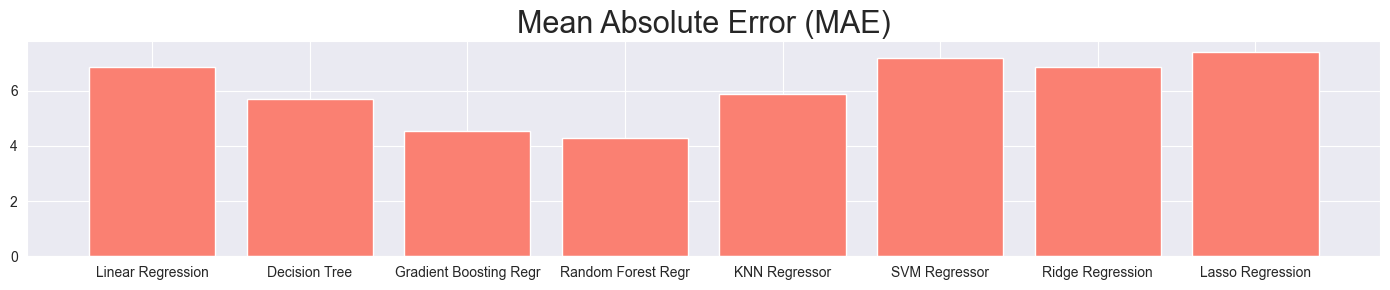

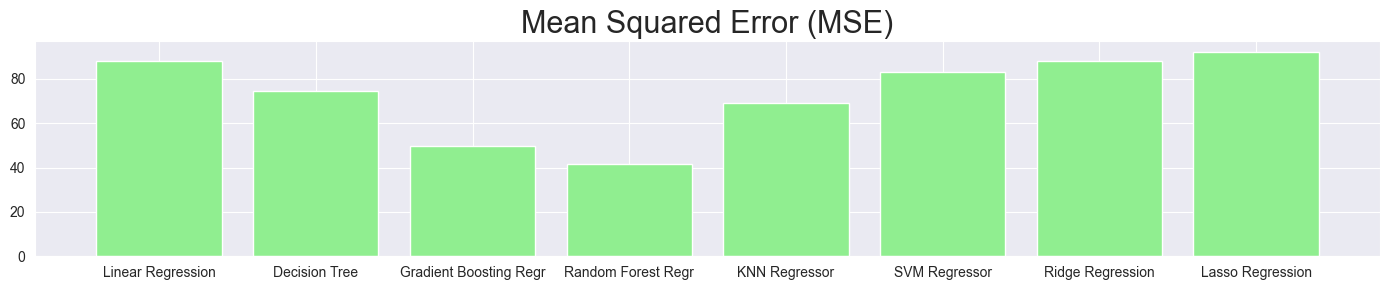

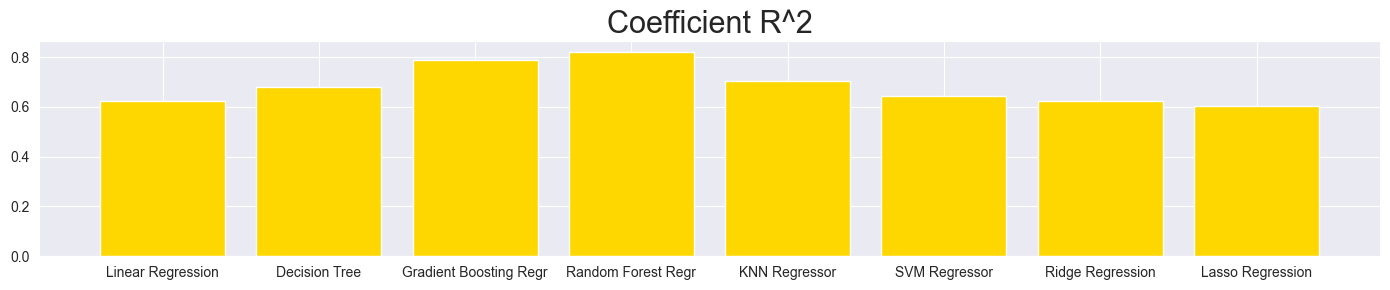

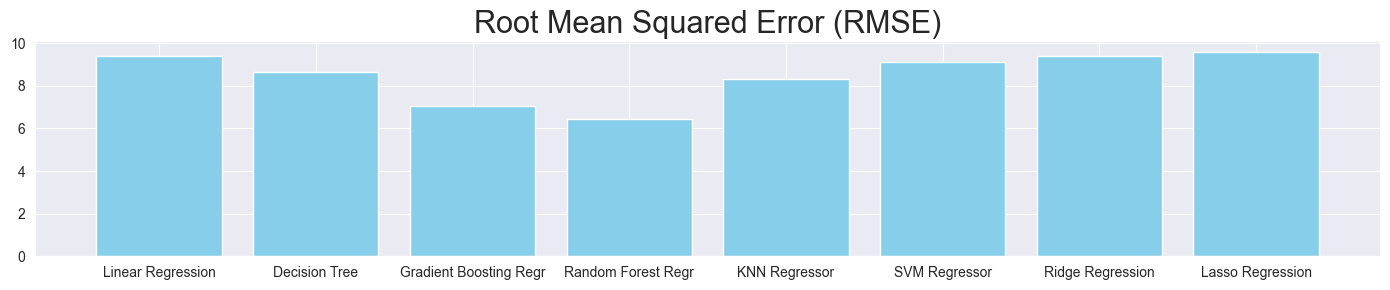

In [370]:
# Create a figure and set its size
plt.figure(figsize=(14, 3))

# Plot MAE
plt.bar(metrics_df['Model'], metrics_df['MAE'], color='salmon')
plt.title('Mean Absolute Error (MAE)', size= 22)
plt.xticks(rotation=0, ha='center', wrap=True)
plt.tight_layout()

# Create a figure and set its size
plt.figure(figsize=(14, 3))
# Plot MSE

plt.bar(metrics_df['Model'], metrics_df['MSE'], color='lightgreen')
plt.title('Mean Squared Error (MSE)', size= 22)
plt.xticks(rotation=0, ha='center', wrap=True)
plt.tight_layout()


# Create a figure and set its size
plt.figure(figsize=(14, 3))
plt.bar(metrics_df['Model'], metrics_df['R2'], color='gold')
plt.title('Coefficient R^2', size= 22)
plt.xticks(rotation=0, ha='center', wrap=True)
plt.tight_layout()

# Create a figure and set its size
plt.figure(figsize=(14, 3))

# Plot RMSE
plt.bar(metrics_df['Model'], metrics_df['RMSE'], color='skyblue')
plt.title('Root Mean Squared Error (RMSE)', size= 22)
plt.xticks(rotation=0, ha='center', wrap=True)
plt.tight_layout()

# Show the plot
plt.show()

In [371]:
n_estimators = [100, 200,  500]
max_depths = [30, 50, 70]
min_samples_leafs = [2, 5, 10]
test_results = []

for estimator in n_estimators:
    for max_depth in max_depths:
        for min_samples_leaf in min_samples_leafs: 
            rf = RandomForestRegressor(n_estimators=estimator, max_depth=max_depth, min_samples_leaf=min_samples_leaf, n_jobs=-1, random_state=42)
            rf.fit(X_train, y_train)
            y_pred = rf.predict(X_test)
            
            # Calculating evaluation metrics
            r2 = r2_score(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            rmse = np.sqrt(mse)
            
            # Appending results
            test_results.append((estimator, max_depth, min_samples_leaf, r2, mse, mae, rmse))
            
            print("Number of estimators:", estimator, "Max depth:", max_depth, "Min leafs:", min_samples_leaf, "R2 Score:", r2, "MSE:", mse, "MAE:", mae, "RMSE:", rmse)

Number of estimators: 100 Max depth: 30 Min leafs: 2 R2 Score: 0.8294669075615014 MSE: 39.8107369743311 MAE: 4.210056539559595 RMSE: 6.309575023274634
Number of estimators: 100 Max depth: 30 Min leafs: 5 R2 Score: 0.8138338920542304 MSE: 43.4602448767346 MAE: 4.681028168512908 RMSE: 6.5924384621120735
Number of estimators: 100 Max depth: 30 Min leafs: 10 R2 Score: 0.7707693402265899 MSE: 53.513610597208704 MAE: 5.474048081790912 RMSE: 7.315299761268071
Number of estimators: 100 Max depth: 50 Min leafs: 2 R2 Score: 0.8294669075615014 MSE: 39.8107369743311 MAE: 4.210056539559595 RMSE: 6.309575023274634
Number of estimators: 100 Max depth: 50 Min leafs: 5 R2 Score: 0.8138338920542304 MSE: 43.4602448767346 MAE: 4.681028168512907 RMSE: 6.5924384621120735
Number of estimators: 100 Max depth: 50 Min leafs: 10 R2 Score: 0.77076934022659 MSE: 53.5136105972087 MAE: 5.474048081790912 RMSE: 7.315299761268071
Number of estimators: 100 Max depth: 70 Min leafs: 2 R2 Score: 0.8294669075615014 MSE: 39.

Number of estimators: 500 Max depth: 70 Min leafs: 2 R2 Score: 0.831158395257447 MSE: 39.41586128893948 MAE: 4.231398145266802 RMSE: 6.278205260179017
Number of estimators: 500 Max depth: 70 Min leafs: 5 R2 Score: 0.813427323624983 MSE: 43.55515776764268 MAE: 4.717897434092202 RMSE: 6.599633154020205
Number of estimators: 500 Max depth: 70 Min leafs: 10 R2 Score: 0.7696615387766965 MSE: 53.77222545905669 MAE: 5.489016082231046 RMSE: 7.332954756375951


In [372]:
# Define column names
columns = ['Estimator', 'Max Depth', 'Min Samples Leaf', 'R2 Score', 'MSE', 'MAE', 'RMSE']

# Convert list to DataFrame
test_results_df = pd.DataFrame(test_results, columns=columns)

# Print the DataFrame
test_results_df

Estimator  Max Depth  Min Samples Leaf  R2 Score        MSE       MAE  \
0         100         30                 2  0.829467  39.810737  4.210057   
1         100         30                 5  0.813834  43.460245  4.681028   
2         100         30                10  0.770769  53.513611  5.474048   
3         100         50                 2  0.829467  39.810737  4.210057   
4         100         50                 5  0.813834  43.460245  4.681028   
5         100         50                10  0.770769  53.513611  5.474048   
6         100         70                 2  0.829467  39.810737  4.210057   
7         100         70                 5  0.813834  43.460245  4.681028   
8         100         70                10  0.770769  53.513611  5.474048   
9         200         30                 2  0.831345  39.372359  4.219989   
10        200         30                 5  0.814367  43.335869  4.697491   
11        200         30                10  0.770409  53.597721  5.486367   
12        200         50                 2  0.831345  39.372359  4.219989   
13        200         50                 5  0.814367  43.335869  4.697491   
14        200         50                10  0.770409  53.597721  5.486367   
15        200         70                 2  0.831345  39.372359  4.219989   
16        200         70                 5  0.814367  43.335869  4.697491   
17        200         70                10  0.770409  53.597721  5.486367   
18        500         30                 2  0.831158  39.415861  4.231398   
19        500         30                 5  0.813427  43.555158  4.717897   
20        500         30                10  0.769662  53.772225  5.489016   
21        500         50                 2  0.831158  39.415861  4.231398   
22        500         50                 5  0.813427  43.555158  4.717897   
23        500         50                10  0.769662  53.772225  5.489016   
24        500         70                 2  0.831158  39.415861  4.231398   
25        500         70                 5  0.813427  43.555158  4.717897   
26        500         70                10  0.769662  53.772225  5.489016   

        RMSE  
0   6.309575  
1   6.592438  
2   7.315300  
3   6.309575  
4   6.592438  
5   7.315300  
6   6.309575  
7   6.592438  
8   7.315300  
9   6.274740  
10  6.582998  
11  7.321046  
12  6.274740  
13  6.582998  
14  7.321046  
15  6.274740  
16  6.582998  
17  7.321046  
18  6.278205  
19  6.599633  
20  7.332955  
21  6.278205  
22  6.599633  
23  7.332955  
24  6.278205  
25  6.599633  
26  7.332955

In [373]:
ylab = y_test  # True target values
predVals = rf.predict(X_test)  # Predicted target values using Random Forest model

# Compute absolute error between true and predicted values
diff = abs(ylab - predVals)

# Create a dictionary to store true values, predicted values, and absolute error
ansFrame = {
    'True Tc': ylab,
    'Predicted Tc': predVals,
    'Absolute error': diff
}

# Create a pandas DataFrame from the dictionary
ansFrame = pd.DataFrame(ansFrame)

# Display the first 50 rows of the DataFrame
ansFrame


True Tc  Predicted Tc  Absolute error
767    31.35     43.793848       12.443848
518    23.25     33.131331        9.881331
978    28.99     28.928422        0.061578
929    21.91     20.799060        1.110940
71     28.80     23.894828        4.905172
..       ...           ...             ...
249    13.82     12.351441        1.468559
874    36.80     37.240048        0.440048
579    22.63     34.375902       11.745902
624    27.53     32.713666        5.183666
751    52.61     39.420591       13.189409

[302 rows x 3 columns]

C:\Users\Praveen\AppData\Roaming\Python\Python311\site-packages\matplotlib\collections.py:963: RuntimeWarning:

invalid value encountered in sqrt



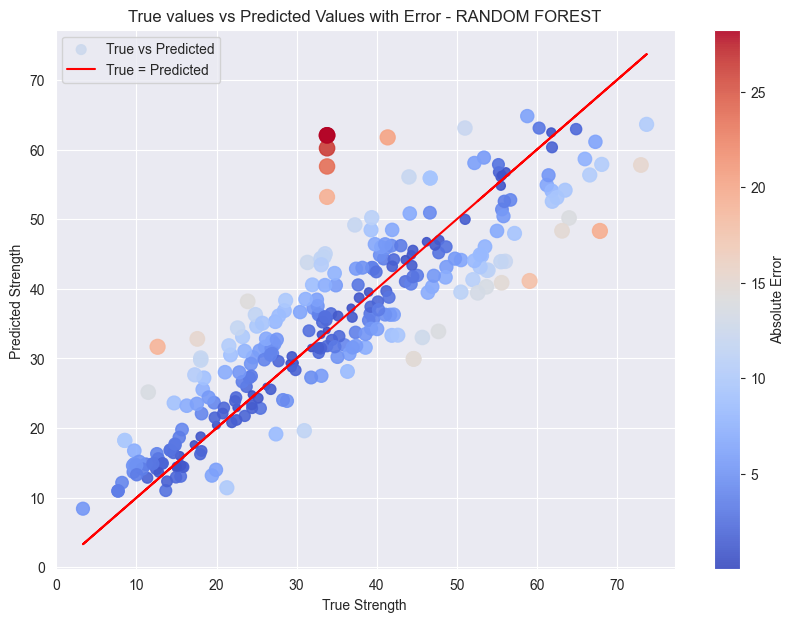

In [374]:
plt.figure(figsize=(10, 7))
# Calculate marker sizes based on absolute error
marker_sizes = 50 * (1 + np.log10(ansFrame['Absolute error']))

# Scatter plot of true vs predicted values with marker sizes based on error
plt.scatter(ansFrame['True Tc'], ansFrame['Predicted Tc'], s=marker_sizes, c=ansFrame['Absolute error'], cmap='coolwarm', alpha=0.9, label='True vs Predicted')

# Plot the line where true values equal predicted values for reference
plt.plot(ansFrame['True Tc'], ansFrame['True Tc'], color='red', label='True = Predicted')

plt.xlabel('True Strength')
plt.ylabel('Predicted Strength ')
plt.title('True values vs Predicted Values with Error - RANDOM FOREST')
plt.colorbar(label='Absolute Error')
plt.legend()
plt.show()